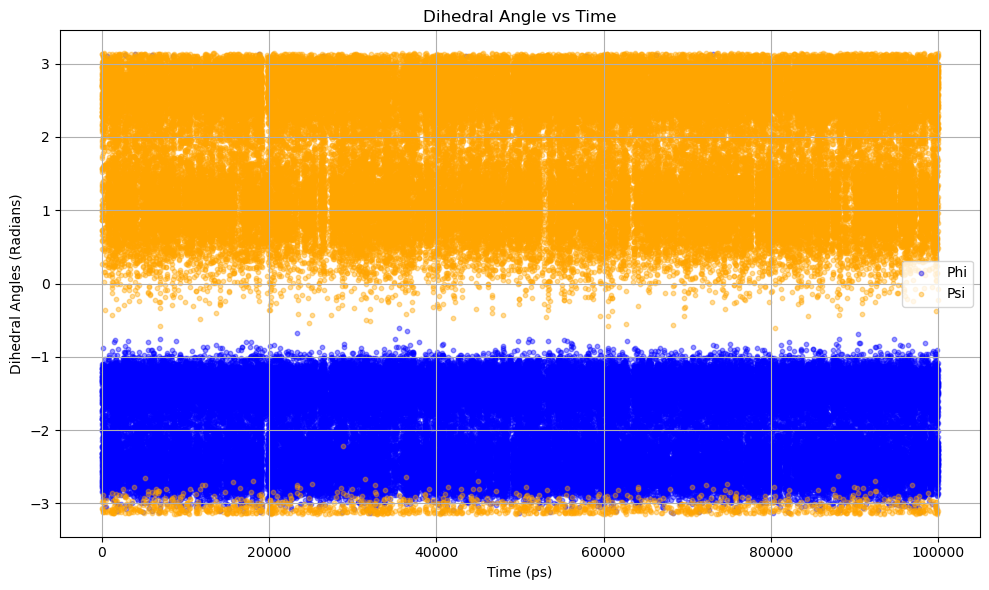

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Load COLVAR file
# Replace 'COLVAR' with the path to your COLVAR file
data = np.loadtxt('COLVAR A', skiprows=1)  # Adjust skiprows based on your file format

# Assuming the dihedrals are in specific columns
steps = data[:, 0]
dihedral1 = data[:, 1]
dihedral2 = data[:, 2]

# Plotting both dihedrals as points
plt.figure(figsize=(10, 6))
plt.scatter(steps, dihedral1, label='Phi', color='blue', alpha=0.4, s=10)  # s controls marker size
plt.scatter(steps, dihedral2, label='Psi', color='orange', alpha=0.4, s=10)  # s controls marker size

# Adding labels and title
plt.title('Dihedral Angle vs Time')
plt.xlabel('Time (ps)')
plt.ylabel('Dihedral Angles (Radians)')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
# Save the figure as a PNG file
plt.savefig('Dihedral_Time_COLVARA.png', format='png')
plt.show()


Time shape: (100001,)
Phi shape: (100001,)
Psi shape: (100001,)


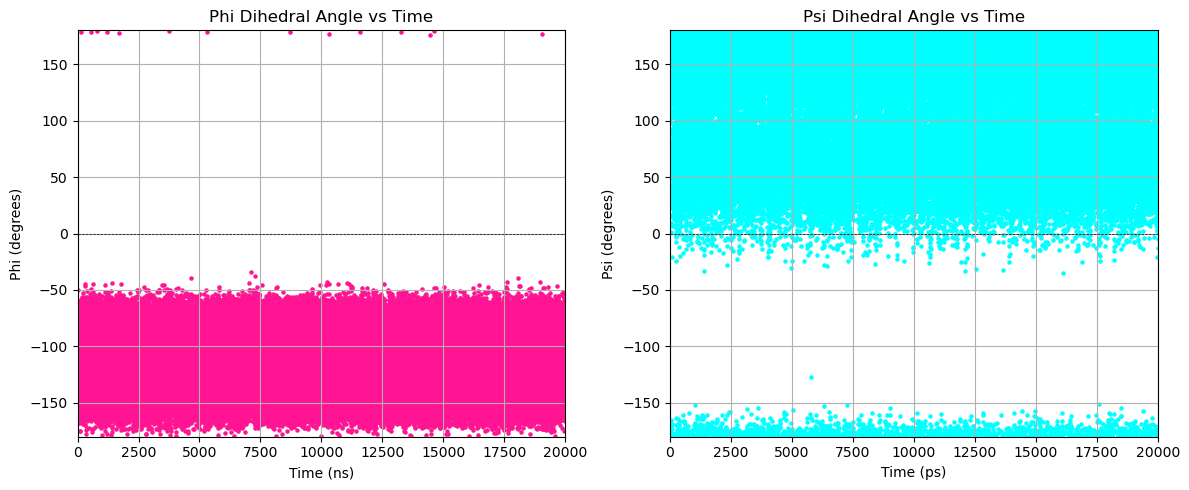

In [16]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory
trajectory = md.load('adpA.xtc', top='adpA.gro')

# Select the atoms for phi and psi dihedrals
phi_indices = [[0, 1, 2, 3]]  # Adjust these based on your system
psi_indices = [[1, 2, 3, 4]]  # Adjust these based on your system

# Calculate the dihedrals
phi = md.compute_phi(trajectory, phi_indices)
psi = md.compute_psi(trajectory, psi_indices)

# Extract the dihedral angles (second element) and convert to degrees
phi_degrees = np.degrees(phi[1].flatten())
psi_degrees = np.degrees(psi[1].flatten())

# Print shapes for debugging
print("Time shape:", trajectory.time.shape)
print("Phi shape:", phi_degrees.shape)
print("Psi shape:", psi_degrees.shape)

# Create time vector
time = trajectory.time

# Plot phi vs time
plt.figure(figsize=(12, 5))

# Plot Phi as points
plt.subplot(1, 2, 1)
plt.scatter(time[:phi_degrees.size], phi_degrees, label='Phi', color='deeppink', s=5)  # Use scatter for points
plt.title('Phi Dihedral Angle vs Time')
plt.xlabel('Time (ns)')
plt.ylabel('Phi (degrees)')
plt.xlim(0, time[-1])  # Set x-limits
plt.ylim(-180, 180)    # Set y-limits
plt.axhline(0, color='k', lw=0.5, ls='--')  # Add a horizontal line at 0
plt.grid()

# Plot Psi as points
plt.subplot(1, 2, 2)
plt.scatter(time[:psi_degrees.size], psi_degrees, label='Psi', color='aqua', s=5)  # Use scatter for points
plt.title('Psi Dihedral Angle vs Time')
plt.xlabel('Time (ps)')
plt.ylabel('Psi (degrees)')
plt.xlim(0, time[-1])  # Set x-limits
plt.ylim(-180, 180)    # Set y-limits
plt.axhline(0, color='k', lw=0.5, ls='--')  # Add a horizontal line at 0
plt.grid()

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('Dihedral_Time.png', format='png')
plt.show()

/state/partition1/job-52212550/ipykernel_216651/882778979.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/state/partition1/job-52212550/ipykernel_216651/882778979.py:56: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('Dihedral_Comparison.png', format='png')
/ext3/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


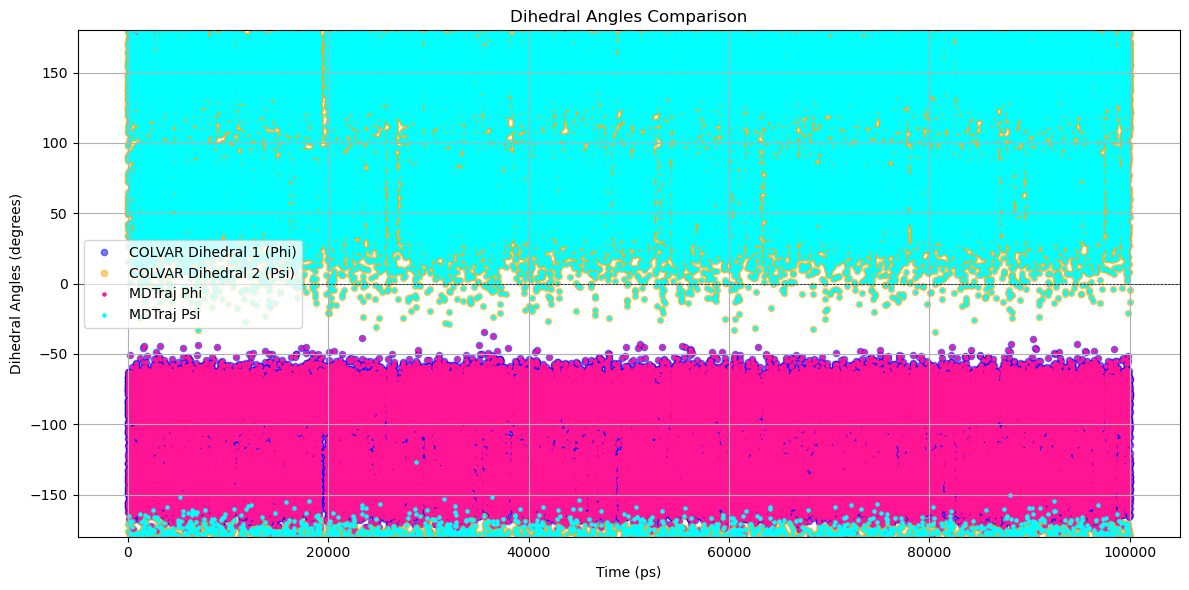

In [17]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory
trajectory = md.load('adpA.xtc', top='adpA.gro')

# Select the atoms for phi and psi dihedrals
phi_indices = [[0, 1, 2, 3]]  # Adjust these based on your system
psi_indices = [[1, 2, 3, 4]]  # Adjust these based on your system

# Calculate the dihedrals
phi = md.compute_phi(trajectory, phi_indices)
psi = md.compute_psi(trajectory, psi_indices)

# Extract the dihedral angles (second element) and convert to degrees
phi_degrees = np.degrees(phi[1].flatten())
psi_degrees = np.degrees(psi[1].flatten())

# Load COLVAR file
colvar_data = np.loadtxt('COLVAR A', skiprows=5)  # Adjust skiprows based on your file format
steps = colvar_data[:, 0]

# Convert COLVAR dihedrals from radians to degrees
dihedral1 = np.degrees(colvar_data[:, 1])  # Replace with the correct column for phi
dihedral2 = np.degrees(colvar_data[:, 2])  # Replace with the correct column for psi

# Create a corresponding time vector for phi and psi based on the COLVAR steps
# Assuming COLVAR steps correspond to trajectory frames, adjust if needed
frame_indices = np.linspace(0, len(trajectory) - 1, len(steps), dtype=int)
phi_colvar = phi_degrees[frame_indices] if len(phi_degrees) > len(steps) else phi_degrees
psi_colvar = psi_degrees[frame_indices] if len(psi_degrees) > len(steps) else psi_degrees

# Plotting
plt.figure(figsize=(12, 6))

# Plot COLVAR dihedrals
plt.scatter(steps, dihedral1, label='COLVAR Dihedral 1 (Phi)', color='blue', alpha=0.5, s=20)
plt.scatter(steps, dihedral2, label='COLVAR Dihedral 2 (Psi)', color='orange', alpha=0.5, s=20)

# Plot computed phi and psi dihedrals on the COLVAR steps
plt.scatter(steps[:phi_colvar.size], phi_colvar, label='MDTraj Phi', color='deeppink', s=5)
plt.scatter(steps[:psi_colvar.size], psi_colvar, label='MDTraj Psi', color='aqua', s=5)

# Adding labels and title
plt.title('Dihedral Angles Comparison')
plt.xlabel('Time (ps)')
plt.ylabel('Dihedral Angles (degrees)')
plt.axhline(0, color='k', lw=0.5, ls='--')  # Horizontal line at 0
plt.ylim(-180, 180)  # Set y-limits
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.savefig('Dihedral_Comparison.png', format='png')
plt.show()


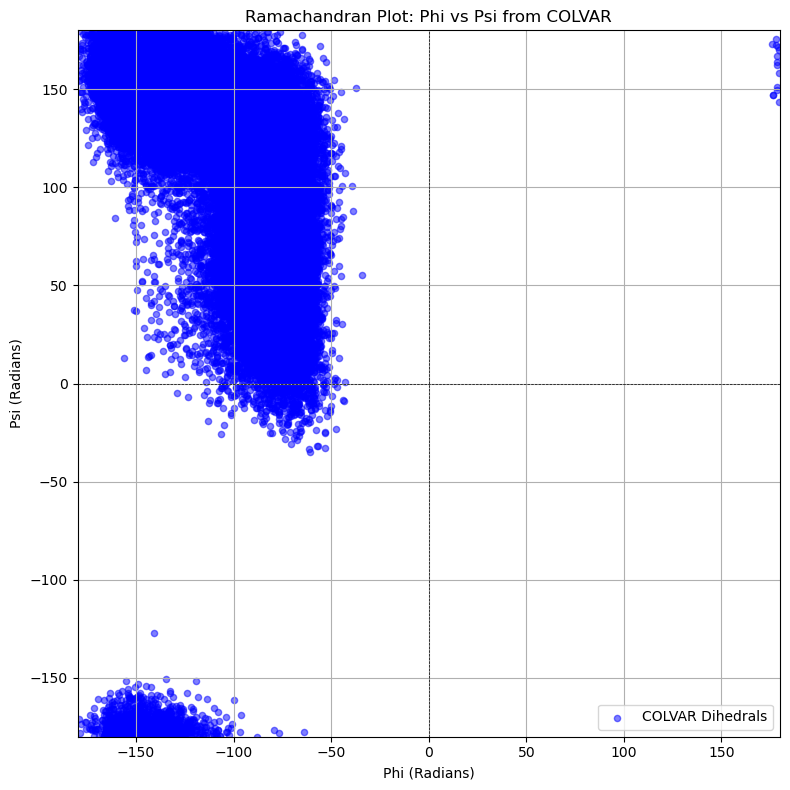

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Load COLVAR file
colvar_data = np.loadtxt('COLVAR A', skiprows=5)  # Adjust skiprows based on your file format
# Assuming phi and psi are in specific columns (adjust as needed)
phi_radians = colvar_data[:, 1]  # Replace with the correct column for phi in radians
psi_radians = colvar_data[:, 2]  # Replace with the correct column for psi in radians

# Convert COLVAR dihedrals from radians to degrees
phi_degrees = np.degrees(phi_radians)
psi_degrees = np.degrees(psi_radians)

# Create a Ramachandran-like plot
plt.figure(figsize=(8, 8))

# Scatter plot of phi vs. psi from COLVAR
plt.scatter(phi_degrees, psi_degrees, label='COLVAR Dihedrals', color='blue', alpha=0.5, s=20)

# Adding labels and title
plt.title('Ramachandran Plot: Phi vs Psi from COLVAR')
plt.xlabel('Phi (Radians)')
plt.ylabel('Psi (Radians)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.axhline(0, color='k', lw=0.5, ls='--')  # Horizontal line at 0
plt.axvline(0, color='k', lw=0.5, ls='--')  # Vertical line at 0
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('Ramachandran_Plot_COLVAR_A.png', format='png')
plt.show()


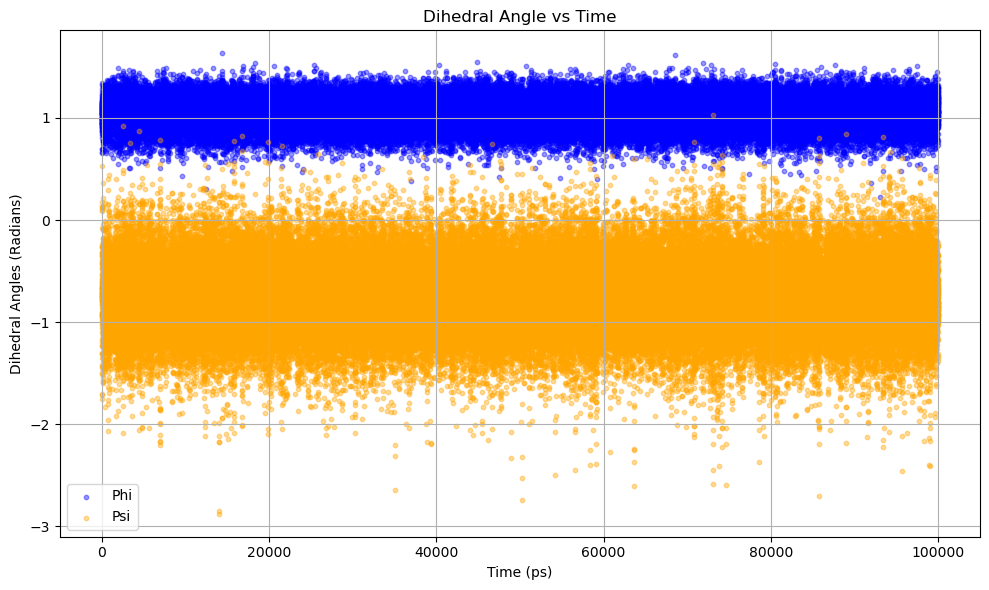

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Load COLVAR file
# Replace 'COLVAR' with the path to your COLVAR file
data = np.loadtxt('COLVAR B', skiprows=1)  # Adjust skiprows based on your file format

# Assuming the dihedrals are in specific columns
steps = data[:, 0]
dihedral1 = data[:, 1]
dihedral2 = data[:, 2]

# Plotting both dihedrals as points
plt.figure(figsize=(10, 6))
plt.scatter(steps, dihedral1, label='Phi', color='blue', alpha=0.4, s=10)  # s controls marker size
plt.scatter(steps, dihedral2, label='Psi', color='orange', alpha=0.4, s=10)  # s controls marker size

# Adding labels and title
plt.title('Dihedral Angle vs Time')
plt.xlabel('Time (ps)')
plt.ylabel('Dihedral Angles (Radians)')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
# Save the figure as a PNG file
plt.savefig('Dihedral_Time_COLVAR_B.png', format='png')
plt.show()


Time shape: (100001,)
Phi shape: (100001,)
Psi shape: (100001,)


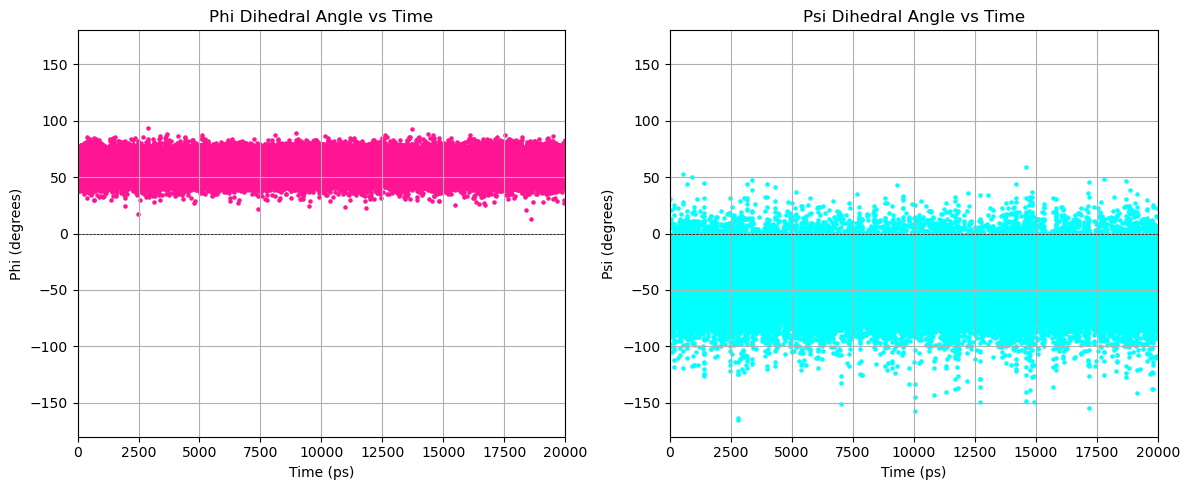

In [20]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory
trajectory = md.load('adpB.xtc', top='adpB.gro')

# Select the atoms for phi and psi dihedrals
phi_indices = [[0, 1, 2, 3]]  # Adjust these based on your system
psi_indices = [[1, 2, 3, 4]]  # Adjust these based on your system

# Calculate the dihedrals
phi = md.compute_phi(trajectory, phi_indices)
psi = md.compute_psi(trajectory, psi_indices)

# Extract the dihedral angles (second element) and convert to degrees
phi_degrees = np.degrees(phi[1].flatten())
psi_degrees = np.degrees(psi[1].flatten())

# Print shapes for debugging
print("Time shape:", trajectory.time.shape)
print("Phi shape:", phi_degrees.shape)
print("Psi shape:", psi_degrees.shape)

# Create time vector
time = trajectory.time

# Plot phi vs time
plt.figure(figsize=(12, 5))

# Plot Phi as points
plt.subplot(1, 2, 1)
plt.scatter(time[:phi_degrees.size], phi_degrees, label='Phi', color='deeppink', s=5)  # Use scatter for points
plt.title('Phi Dihedral Angle vs Time')
plt.xlabel('Time (ps)')
plt.ylabel('Phi (degrees)')
plt.xlim(0, time[-1])  # Set x-limits
plt.ylim(-180, 180)    # Set y-limits
plt.axhline(0, color='k', lw=0.5, ls='--')  # Add a horizontal line at 0
plt.grid()

# Plot Psi as points
plt.subplot(1, 2, 2)
plt.scatter(time[:psi_degrees.size], psi_degrees, label='Psi', color='aqua', s=5)  # Use scatter for points
plt.title('Psi Dihedral Angle vs Time')
plt.xlabel('Time (ps)')
plt.ylabel('Psi (degrees)')
plt.xlim(0, time[-1])  # Set x-limits
plt.ylim(-180, 180)    # Set y-limits
plt.axhline(0, color='k', lw=0.5, ls='--')  # Add a horizontal line at 0
plt.grid()

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('Dihedral_Time_mdtraj.png', format='png')
plt.show()

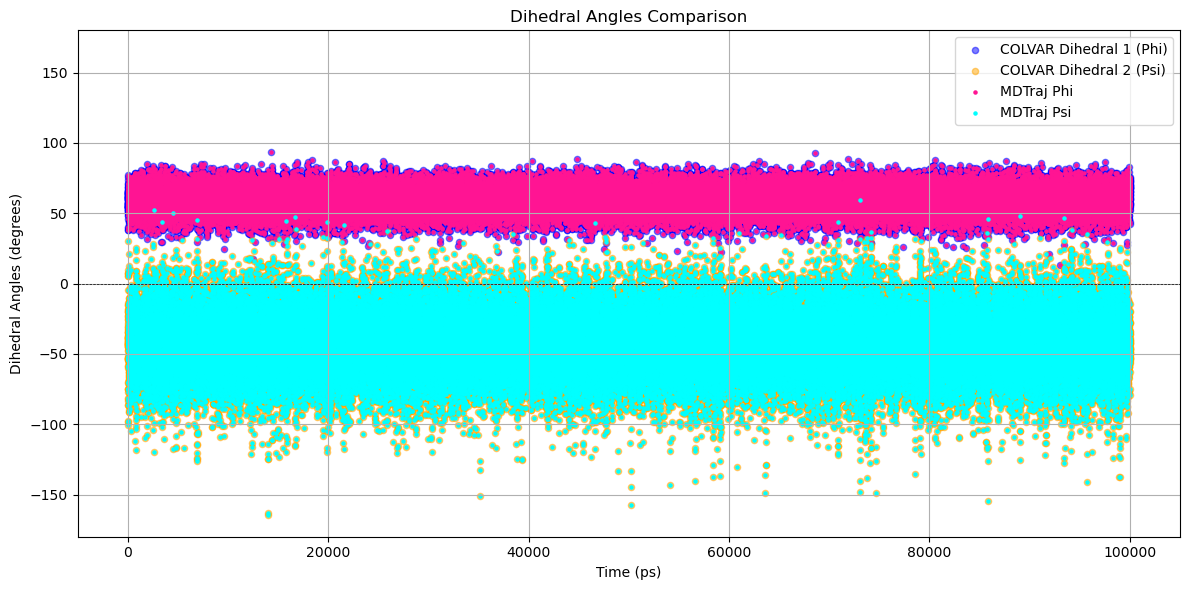

In [21]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory
trajectory = md.load('adpB.xtc', top='adpB.gro')

# Select the atoms for phi and psi dihedrals
phi_indices = [[0, 1, 2, 3]]  # Adjust these based on your system
psi_indices = [[1, 2, 3, 4]]  # Adjust these based on your system

# Calculate the dihedrals
phi = md.compute_phi(trajectory, phi_indices)
psi = md.compute_psi(trajectory, psi_indices)

# Extract the dihedral angles (second element) and convert to degrees
phi_degrees = np.degrees(phi[1].flatten())
psi_degrees = np.degrees(psi[1].flatten())

# Load COLVAR file
colvar_data = np.loadtxt('COLVAR B', skiprows=1)  # Adjust skiprows based on your file format
steps = colvar_data[:, 0]

# Convert COLVAR dihedrals from radians to degrees
dihedral1 = np.degrees(colvar_data[:, 1])  # Replace with the correct column for phi
dihedral2 = np.degrees(colvar_data[:, 2])  # Replace with the correct column for psi

# Create a corresponding time vector for phi and psi based on the COLVAR steps
# Assuming COLVAR steps correspond to trajectory frames, adjust if needed
frame_indices = np.linspace(0, len(trajectory) - 1, len(steps), dtype=int)
phi_colvar = phi_degrees[frame_indices] if len(phi_degrees) > len(steps) else phi_degrees
psi_colvar = psi_degrees[frame_indices] if len(psi_degrees) > len(steps) else psi_degrees

# Plotting
plt.figure(figsize=(12, 6))

# Plot COLVAR dihedrals
plt.scatter(steps, dihedral1, label='COLVAR Dihedral 1 (Phi)', color='blue', alpha=0.5, s=20)
plt.scatter(steps, dihedral2, label='COLVAR Dihedral 2 (Psi)', color='orange', alpha=0.5, s=20)

# Plot computed phi and psi dihedrals on the COLVAR steps
plt.scatter(steps[:phi_colvar.size], phi_colvar, label='MDTraj Phi', color='deeppink', s=5)
plt.scatter(steps[:psi_colvar.size], psi_colvar, label='MDTraj Psi', color='aqua', s=5)

# Adding labels and title
plt.title('Dihedral Angles Comparison')
plt.xlabel('Time (ps)')
plt.ylabel('Dihedral Angles (degrees)')
plt.axhline(0, color='k', lw=0.5, ls='--')  # Horizontal line at 0
plt.ylim(-180, 180)  # Set y-limits
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.savefig('Dihedral_Comparison_COLVAR_B.png', format='png')
plt.show()


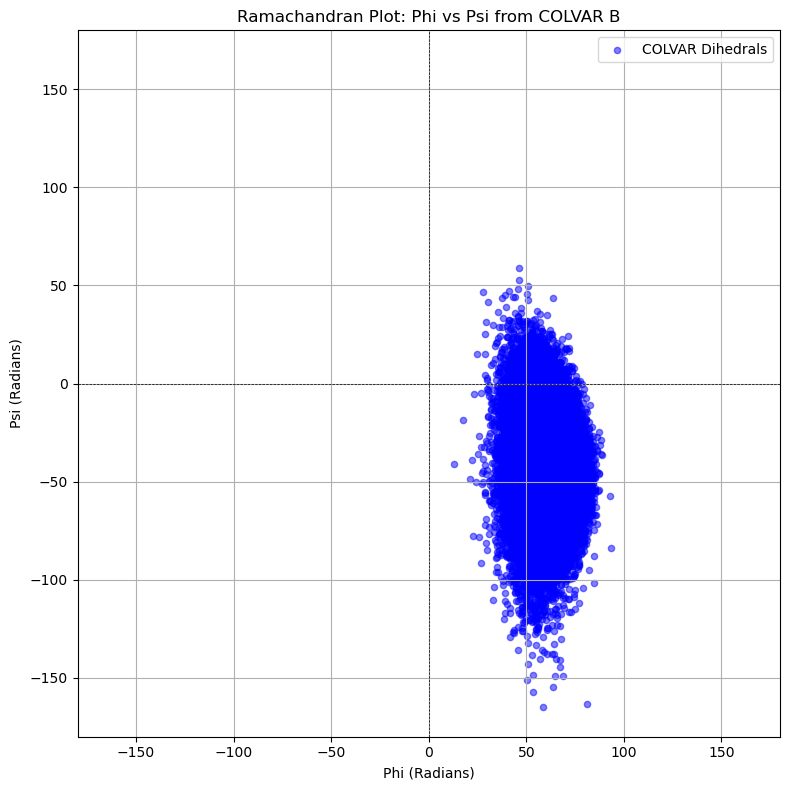

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Load COLVAR file
colvar_data = np.loadtxt('COLVAR B', skiprows=5)  # Adjust skiprows based on your file format
# Assuming phi and psi are in specific columns (adjust as needed)
phi_radians = colvar_data[:, 1]  # Replace with the correct column for phi in radians
psi_radians = colvar_data[:, 2]  # Replace with the correct column for psi in radians

# Convert COLVAR dihedrals from radians to degrees
phi_degrees = np.degrees(phi_radians)
psi_degrees = np.degrees(psi_radians)

# Create a Ramachandran-like plot
plt.figure(figsize=(8, 8))

# Scatter plot of phi vs. psi from COLVAR
plt.scatter(phi_degrees, psi_degrees, label='COLVAR Dihedrals', color='blue', alpha=0.5, s=20)

# Adding labels and title
plt.title('Ramachandran Plot: Phi vs Psi from COLVAR B')
plt.xlabel('Phi (Radians)')
plt.ylabel('Psi (Radians)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.axhline(0, color='k', lw=0.5, ls='--')  # Horizontal line at 0
plt.axvline(0, color='k', lw=0.5, ls='--')  # Vertical line at 0
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('Ramachandran_Plot_COLVAR_B.png', format='png')
plt.show()


In [23]:
import numpy as np

# Load COLVAR file
colvar_data = np.loadtxt('COLVAR A', skiprows=5)  # Adjust skiprows based on your file format
# Assuming phi and psi are in specific columns (adjust as needed)
phi_radians = colvar_data[:, 1]  # Replace with the correct column for phi in radians
psi_radians = colvar_data[:, 2]  # Replace with the correct column for psi in radians


# Compute standard deviation
phi_std = np.std(phi_radians)
psi_std = np.std(psi_radians)

# Print results
print(f'Standard Deviation of Phi: {phi_std:.2f} radians')
print(f'Standard Deviation of Psi: {psi_std:.2f} radians')


Standard Deviation of Phi: 0.55 radians
Standard Deviation of Psi: 1.02 radians


In [24]:
import numpy as np

# Load COLVAR file
colvar_data = np.loadtxt('COLVAR B', skiprows=5)  # Adjust skiprows based on your file format
# Assuming phi and psi are in specific columns (adjust as needed)
phi_radians = colvar_data[:, 1]  # Replace with the correct column for phi in radians
psi_radians = colvar_data[:, 2]  # Replace with the correct column for psi in radians


# Compute standard deviation
phi_std = np.std(phi_radians)
psi_std = np.std(psi_radians)

# Print results
print(f'Standard Deviation of Phi: {phi_std:.2f} radians')
print(f'Standard Deviation of Psi: {psi_std:.2f} radians')


Standard Deviation of Phi: 0.13 radians
Standard Deviation of Psi: 0.34 radians


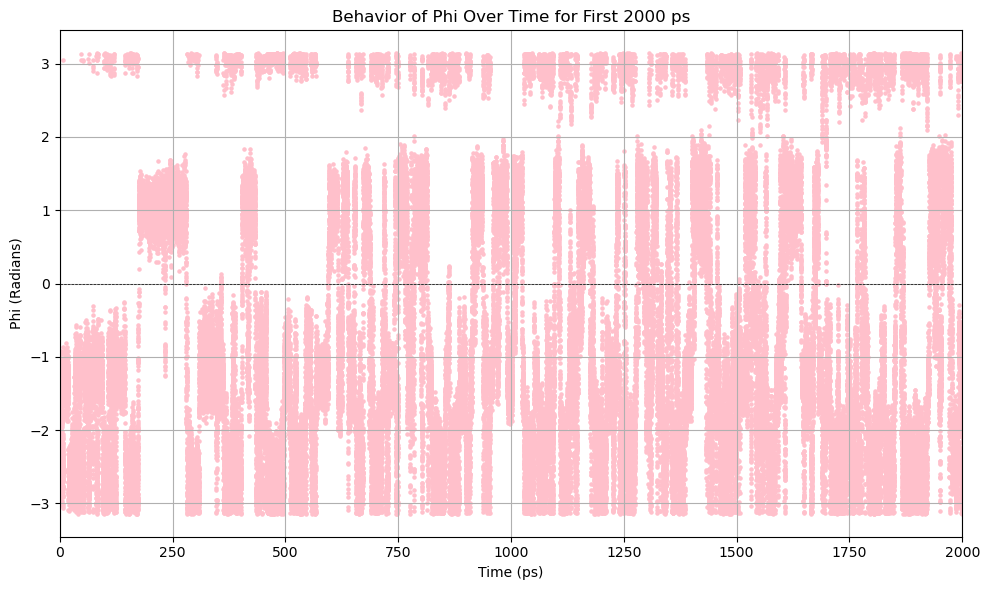

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Load COLVAR file
colvar_data = np.loadtxt('COLVAR after Lugano Part 1', skiprows=1)  # Adjust skiprows if necessary

# Extract relevant columns
time = colvar_data[:, 0]  # First column (time)
cv1 = colvar_data[:, 1]    # Second column (first collective variable)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(time, cv1, color='pink', s=5)  # 's' controls point size
plt.title('Behavior of Phi Over Time for First 2000 ps')
plt.xlabel('Time (ps)')
plt.ylabel('Phi (Radians)')
plt.axhline(0, color='k', lw=0.5, ls='--')  # Optional: horizontal line at 0
plt.grid()

# Set x-axis limits to zoom in on the first 2 nanoseconds
plt.xlim(0, 2000)  # Adjust limits for the x-axis


# Show the plot
plt.tight_layout()
# Save the figure as a PNG file
plt.savefig('Behavior_Phi_2000ps.png', format='png')
plt.show()


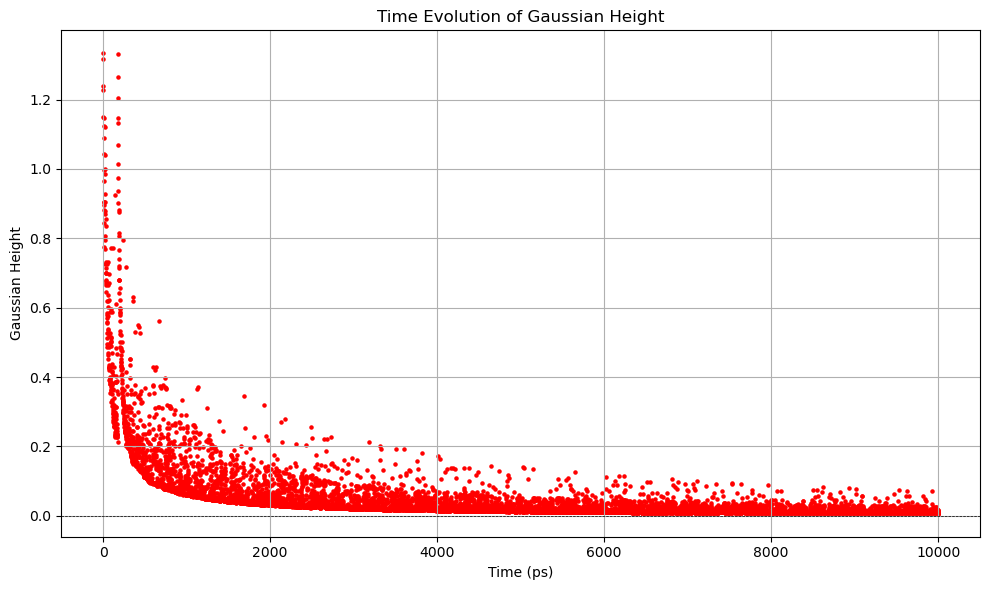

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Load HILLS file
hills_data = np.loadtxt('HILLS', skiprows=1)  # Adjust skiprows if necessary

# Extract relevant columns
time = hills_data[:, 0]  # Assuming first column is time or steps
gaussian_height = hills_data[:, 3]  # Assuming second column is the Gaussian height (adjust index as necessary)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(time, gaussian_height, color='red', label='Gaussian Height', s=5)  # 's' controls point size
plt.title('Time Evolution of Gaussian Height')
plt.xlabel('Time (ps)')  # Adjust units as necessary
plt.ylabel('Gaussian Height')
plt.axhline(0, color='k', lw=0.5, ls='--')  # Optional: horizontal line at 0
plt.grid()


# Show the plot
plt.tight_layout()
# Save the figure as a PNG file
plt.savefig('Time_Evolution_Gaussian_Height.png', format='png')
plt.show()


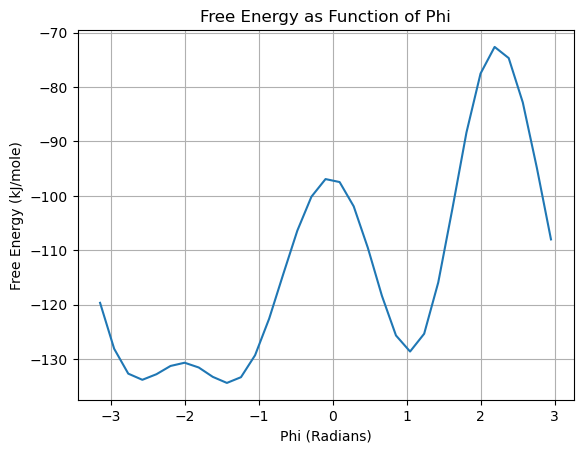

In [27]:
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('fes.dat', skiprows=5)

# Assuming the first column is x and the second column is y
x = data[:, 0]
y = data[:, 1]

# Create the plot
plt.figure()
plt.plot(x, y,)
plt.title('Free Energy as Function of Phi')
plt.xlabel('Phi (Radians)')
plt.ylabel('Free Energy (kJ/mole)')
plt.grid()
 # Save the figure as a PNG file
plt.savefig('Free_Energy_Fes.png', format='png')
plt.show()


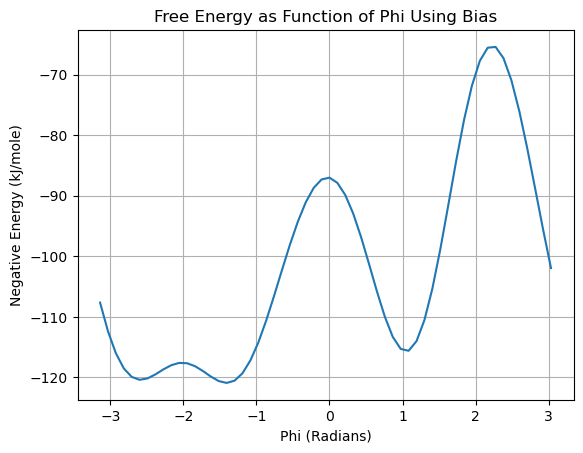

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the grid file
# Specify the columns you want to load; for example, 0 for x and 1 for energy
# Change these indices based on your file structure
data = np.loadtxt('adpAMD.grid.dat', usecols=(0, 1))

# Assuming the first column is x and the second column is energy
x = data[:, 0]  # First column (e.g., x-axis values)
energy = data[:, 1]  # Second column (energy values)

# Plot the negative of the energy
negative_energy = -energy

plt.figure()
plt.plot(x, negative_energy)  # You can customize the plot style
plt.title('Free Energy as Function of Phi Using Bias')
plt.xlabel('Phi (Radians)')  # Change to your specific x-axis label if needed
plt.ylabel('Negative Energy (kJ/mole)')
plt.grid()

# Save the figure as a PNG file
plt.savefig('Negative_Energy_Using_Bias.png', format='png')
plt.show()


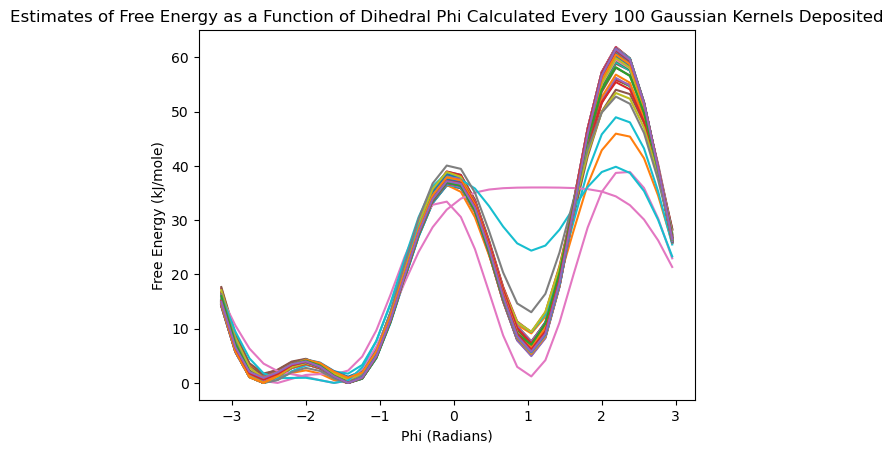

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Specify the folder name
folder_path = 'Fes'  # Adjust this to the full path of your Fes directory

plt.figure()

for filename in os.listdir(folder_path):
    if filename.endswith('.dat'):  # Adjust the file type as needed
        file_path = os.path.join(folder_path, filename)
        
        # Read the DAT file with space as the delimiter and skipping the first 5 rows
        data = pd.read_csv(file_path, delim_whitespace=True, skiprows=5, header=None)
       
        
        # Check if the DataFrame has at least two columns
        if data.shape[1] >= 2:
            plt.plot(data.iloc[:, 0], data.iloc[:, 1], label=filename)  # Plot column 0 vs column 1
        else:
            print(f"Warning: '{filename}' does not have at least two columns.")

plt.title('Estimates of Free Energy as a Function of Dihedral Phi Calculated Every 100 Gaussian Kernels Deposited')
plt.xlabel('Phi (Radians)')
plt.ylabel('Free Energy (kJ/mole)')

# Save the figure as a PNG file
plt.savefig('Estimates_Free_Energy.png', format='png')
plt.show()


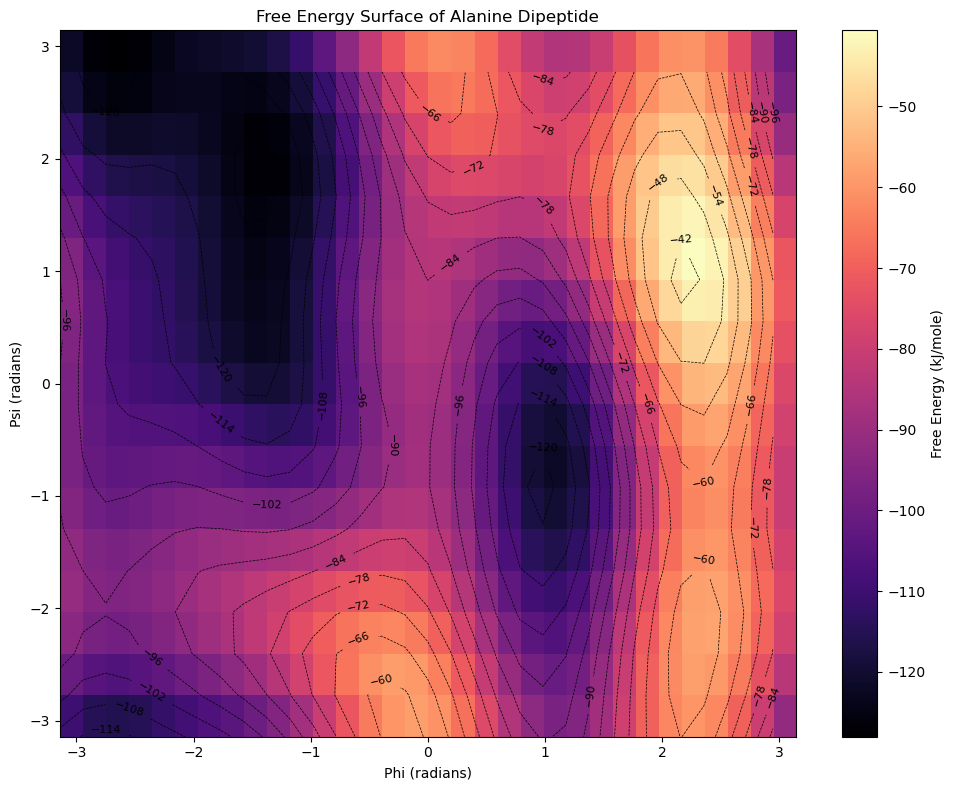

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the file (replace 'file.free' with your actual filename)
data = np.loadtxt('fes.dat', skiprows=8)  # Skip header rows

# Extract phi, psi, and free energy values
phi = data[:, 0]  # Column 1: phi
psi = data[:, 1]  # Column 2: psi
free_energy = data[:, 2]  # Column 3: free energy values

# Define the grid parameters
min_phi = -np.pi
max_phi = np.pi
min_psi = -np.pi
max_psi = np.pi

# Create a grid for phi and psi
nbins_phi = 33
nbins_psi = 18
phi_bins = np.linspace(min_phi, max_phi, nbins_phi)
psi_bins = np.linspace(min_psi, max_psi, nbins_psi)

# Create a 2D histogram for free energy surface
free_energy_surface, _, _ = np.histogram2d(phi, psi, bins=[phi_bins, psi_bins], weights=free_energy)

# Generate meshgrid for contour and imshow
X, Y = np.meshgrid(phi_bins[:-1], psi_bins[:-1])  # Meshgrid for bin edges

# Create the plot
plt.figure(figsize=(10, 8))

# Use imshow to display the free energy surface
cax = plt.imshow(free_energy_surface.T, extent=(min_phi, max_phi, min_psi, max_psi),
                 origin='lower', cmap='magma', aspect='auto')

# Add a color bar
plt.colorbar(cax, label='Free Energy (kJ/mole)')

# Add contour lines
contours = plt.contour(X, Y, free_energy_surface.T, levels=15, colors='black', linewidths=0.5)
plt.clabel(contours, inline=True, fontsize=8)

# Label axes
plt.title('Free Energy Surface of Alanine Dipeptide')
plt.xlabel('Phi (radians)')
plt.ylabel('Psi (radians)')

# Show the plot
plt.tight_layout()
plt.savefig('Free_Energy_Surface_Contour.png', format='png')
plt.show()
